This analysis was built to segment customers based on customer data and demographics. The aim was to identify distinct customer groups for targeted marketing strategies.

By understanding customer clusters, we can tailor marketing efforts for high-value customers and improve sales performance.

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset into a DataFrame
df = pd.read_csv('Customers.csv')

EDA - Exploratory Data Analysis

In [3]:
# Display the first 5 rows of the dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# ***Univariate Analysis***



In [4]:
# Basic descriptive statistics of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checking the column names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

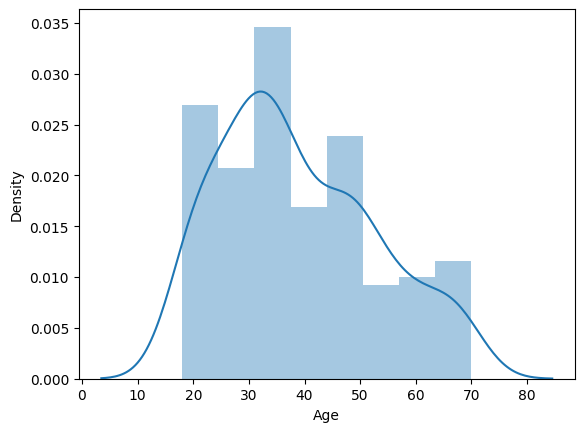

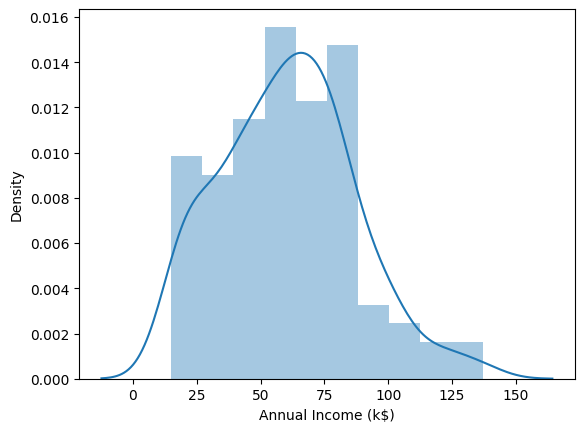

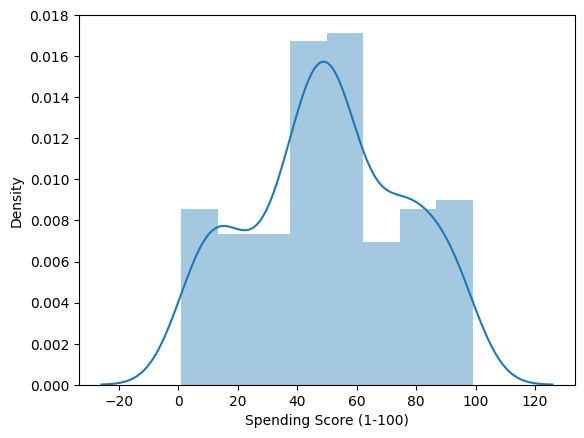

In [6]:
# Feature Selection - List of columns to analyze in univariate analysis
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Univariate analysis - Plotting distributions for each feature

# To identify skewness, normality, and potential outliers.
for i in columns:
  plt.figure()
  sns.distplot(df[i]);

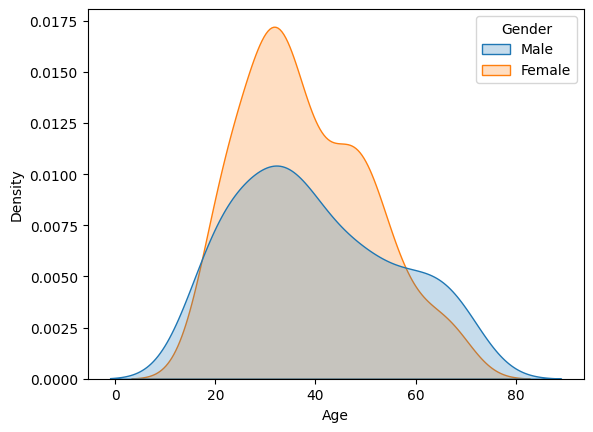

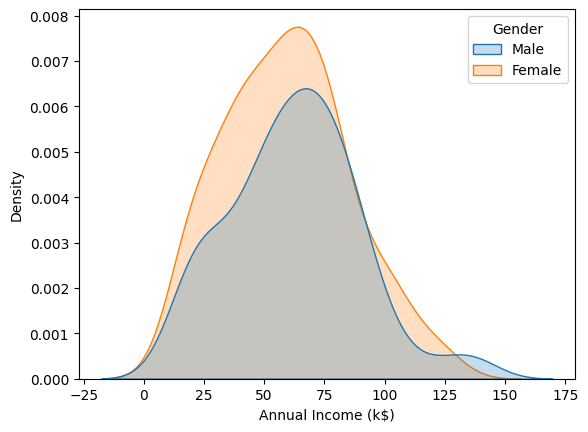

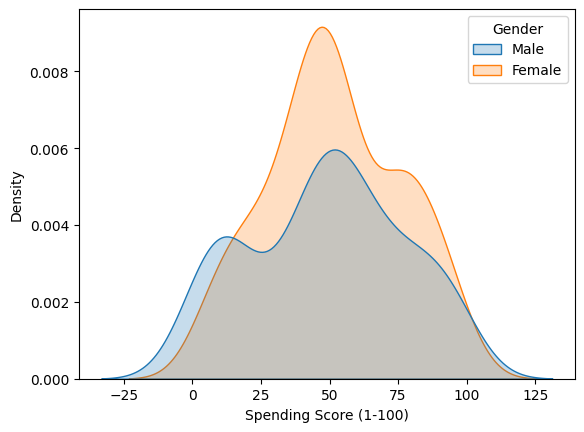

In [7]:
# Plot Kernel Density Estimation (KDE) for each column, grouped by gender

# By grouping by gender, we can observe if males and females have different distributions for each feature.
for i in columns:
  plt.figure()
  sns.kdeplot(data=df, x=i, hue='Gender', shade=True);

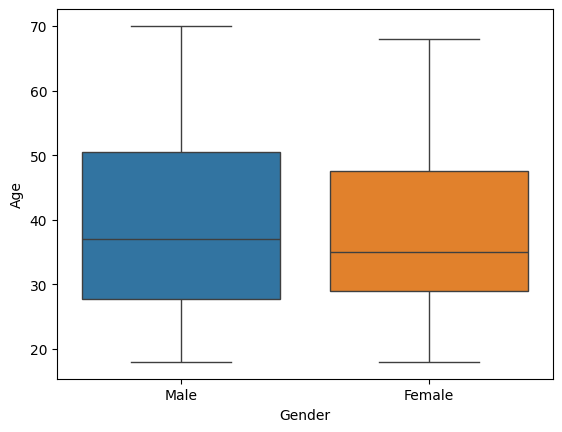

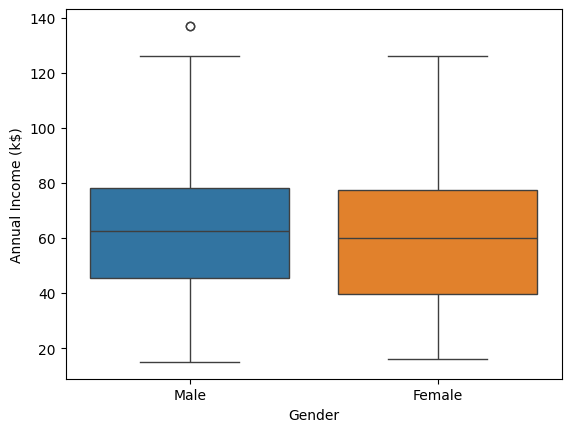

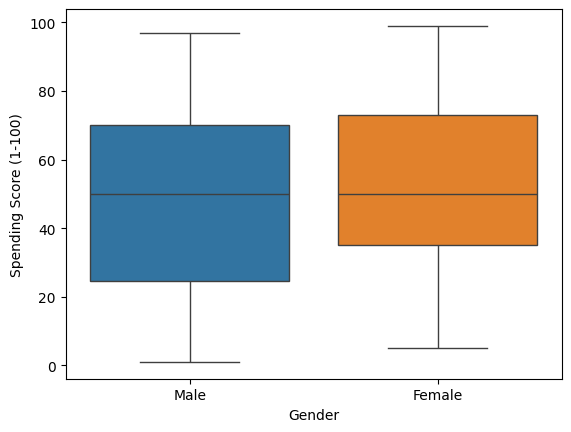

In [8]:
# Boxplot to analyze the distribution of each feature grouped by gender

# Boxplots allow us to visualize the spread of the data and identify any potential outliers
for i in columns:
  plt.figure()
  sns.boxplot(data=df,x='Gender',y=i,hue='Gender');

In [9]:
# Checking the gender distribution in the dataset (Skewness/Imbalance - can affect clustering)
df['Gender'].value_counts(normalize = True)

,proportion
Gender,
Female,0.56
Male,0.44


# ***Bivariate Analysis***

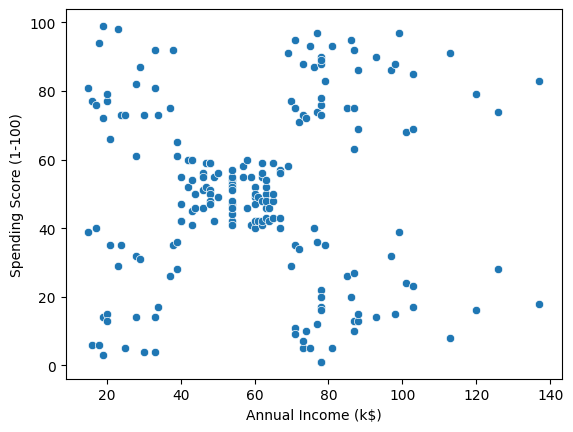

In [10]:
# Scatterplot of Annual Income vs Spending Score

# This helps us check for any obvious linear or non-linear patterns, and is crucial before applying clustering algorithms.
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

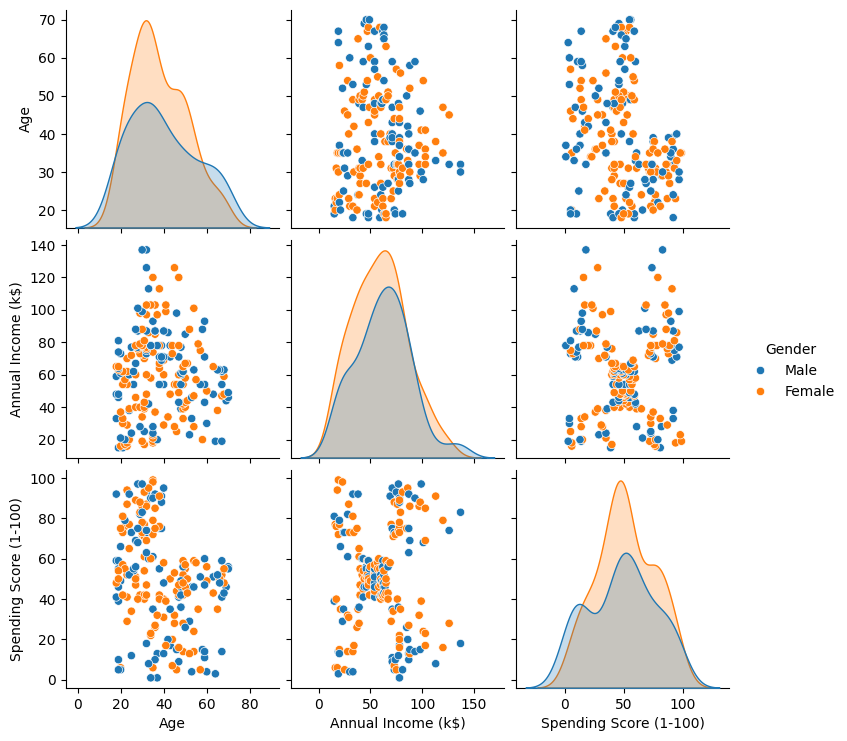

In [11]:
# Drop the 'CustomerID' column (it is just an identifier)
df=df.drop('CustomerID',axis=1)

# Pairplot to show relationships between features grouped by gender
sns.pairplot(data=df, hue='Gender');

In [12]:
# Grouping the data by Gender and checking the mean of numerical columns

# Helps us see if there are any significant differences in mean values

# Useful for understanding whether gender-based segmentation might provide meaningful clusters.
df.groupby(['Gender'])[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [13]:
# Check correlation between numerical features (Age, Annual Income, Spending Score)
# Helps us understand how closely related the features are
df.select_dtypes(include=['number']).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


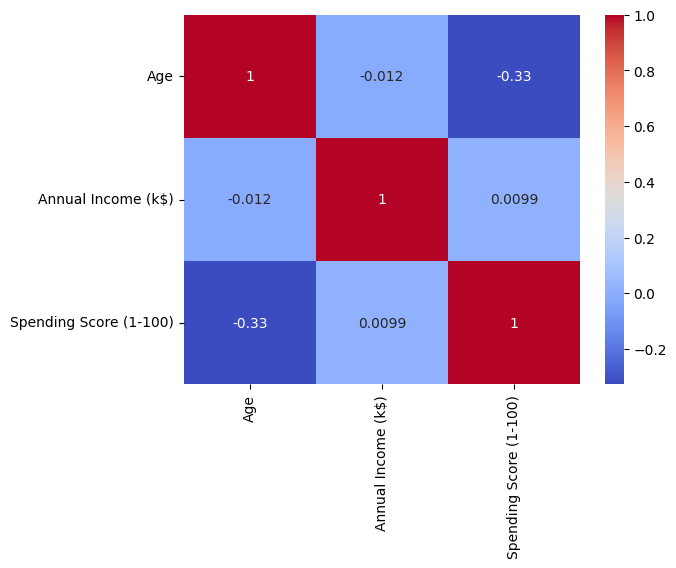

In [14]:
# Plot heatmap of correlation matrix for the numerical features
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True,cmap='coolwarm');

# ***Clustering - Univariate, Bivariate, Multivariate***

In [15]:
#Univariate Clustering

In [16]:
# Set number of clusters to 6
clustering1 = KMeans(n_clusters=6)

In [17]:
# Clustering - Univariate (only using 'Annual Income' feature for clustering)

clustering1.fit(df[['Annual Income (k$)']]) # Fit KMeans to Annual Income data

KMeans(n_clusters=6)

In [18]:
# Check the cluster labels assigned to each customer
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [19]:
# Add the cluster labels to the dataframe as a new column
df['Income Cluster'] = clustering1.labels_

# Display the first 5 rows to see the added cluster column
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [20]:
# Check the number of customers in each income cluster
df['Income Cluster'].value_counts()

,count
Income Cluster,
3,48
0,48
4,44
2,38
1,16
5,6


In [21]:
# Check inertia - a measure of the sum of squared distances from each point to its cluster center
# Lower the inertia, closer are the data points to their centroids
clustering1.inertia_

5742.224880382768

In [22]:
# Inertia scores for clustering with different number of clusters (1 to 10)
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [23]:
inertia_scores

[137277.2800000002,
 49761.737012987025,
 23528.152173913048,
 17410.741031941037,
 8481.49619047619,
 5081.484660267269,
 4430.23798941799,
 2822.4996947496957,
 2177.7882395382403,
 1999.8672993673003]

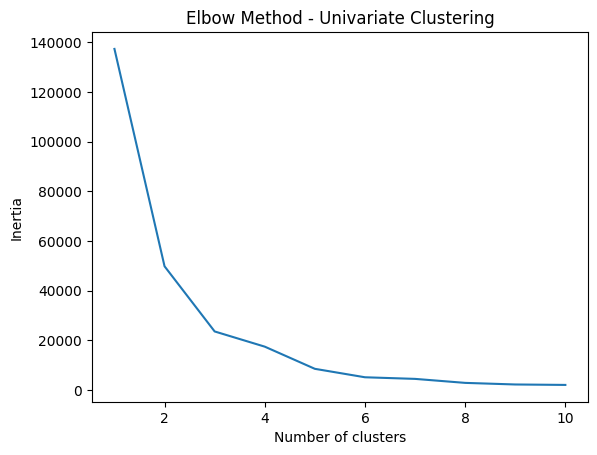

In [24]:
# Plotting inertia scores to determine optimal number of clusters using the elbow method

# Identifying the point where adding more clusters doesn’t significantly improve the clustering
plt.plot(range(1,11), inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Univariate Clustering')
plt.show()

In [25]:
# Fit the final KMeans model with the chosen number of clusters (3)
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)']])
clustering1.labels_
df['Income Cluster'] = clustering1.labels_

# Display the updated clusters and their count
df.head()
df['Income Cluster'].value_counts()

,count
Income Cluster,
0,86
2,58
1,56


In [26]:
# Calculate the mean of numerical features for each income cluster
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


In [27]:
#Bivariate Clustering

In [28]:
# Using both 'Annual Income' and 'Spending Score'
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] =  clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,6
2,Female,20,16,6,2,4
3,Female,23,16,77,2,6
4,Female,31,17,40,2,4


In [29]:
# Inertia scores for bivariate clustering (using both features)
inertia_scores2=[]
for i in range(1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)

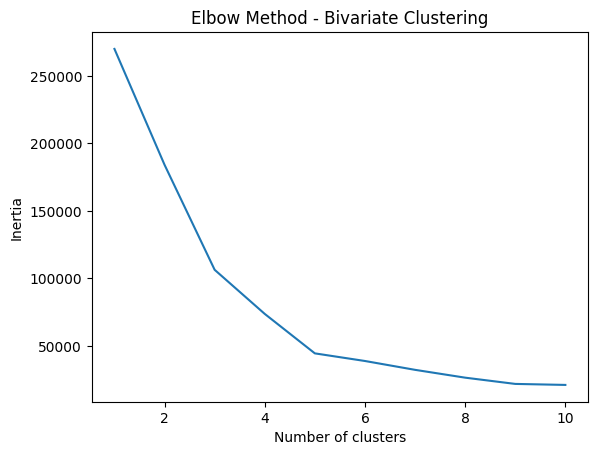

In [30]:
# Plotting inertia scores for bivariate clustering to determine optimal number of clusters
plt.plot(range(1,11), inertia_scores2)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Bivariate Clustering')
plt.show()

In [31]:
# Fit KMeans model with 5 clusters based on bivariate analysis
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] =  clustering2.labels_
# Display the first 5 rows with new cluster labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3


In [32]:
# Check the value counts for the new cluster labels
df['Spending and Income Cluster'].value_counts()

,count
Spending and Income Cluster,
0,80
2,39
1,36
3,23
4,22


In [33]:
# Extract cluster centers to understand the centroids of the clusters
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['Annual Income (k$)', 'Spending Score (1-100)']
centers

,Annual Income (k$),Spending Score (1-100)
0,55.087500,49.712500
1,87.750000,17.583333
2,86.538462,82.128205
3,26.304348,20.913043
4,25.727273,79.363636


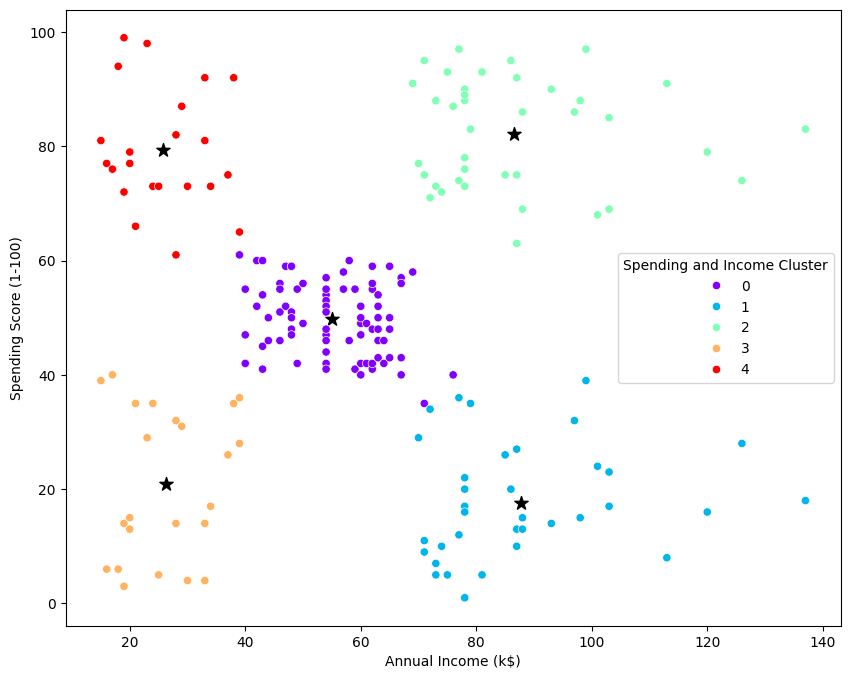

In [34]:
# Plot the clusters with centroids shown as black stars
plt.figure(figsize=(10,8))
plt.scatter(x=centers['Annual Income (k$)'], y=centers['Spending Score (1-100)'], s=100, c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='rainbow');

In [35]:
# Crosstab of Gender vs. Spending and Income Cluster (normalized by index)
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [36]:
# Group by Spending and Income Cluster to calculate the mean of numerical features
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [37]:
#Multivariate Clustering

In [38]:
# Clustering using more features (Age, Annual Income, Spending Score)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,3
1,Male,21,15,81,2,4
2,Female,20,16,6,2,3
3,Female,23,16,77,2,4
4,Female,31,17,40,2,3


In [40]:
# Dropping Gender
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,2,3,True
1,21,15,81,2,4,True
2,20,16,6,2,3,False
3,23,16,77,2,4,False
4,31,17,40,2,3,False


In [41]:
# Scale the features before applying clustering
scaler = StandardScaler()
dff_scaled = scaler.fit_transform(dff)
dff_scaled = pd.DataFrame(dff_scaled, columns=dff.columns)

In [42]:
dff_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,-1.424569,-1.738999,-0.434801,1.362171,1.187494,1.128152
1,-1.281035,-1.738999,1.195704,1.362171,1.909374,1.128152
2,-1.352802,-1.700830,-1.715913,1.362171,1.187494,-0.886405
3,-1.137502,-1.700830,1.040418,1.362171,1.909374,-0.886405
4,-0.563369,-1.662660,-0.395980,1.362171,1.187494,-0.886405


In [43]:
# Inertia scores for multivariate clustering (with all features)
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dff_scaled)
    inertia_scores.append(kmeans.inertia_)

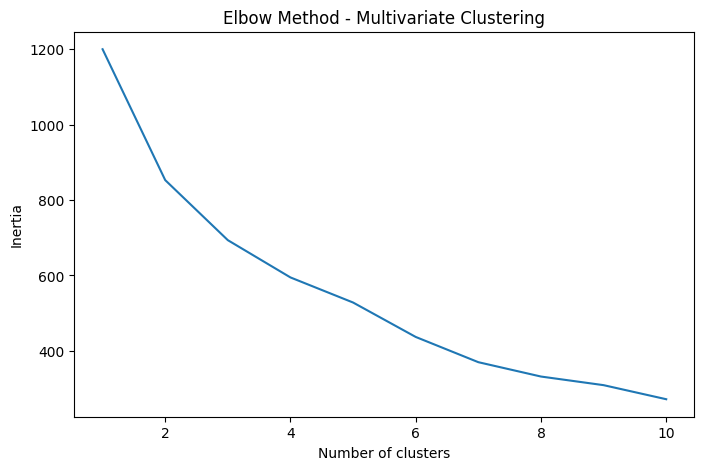

In [44]:
# Plot the inertia scores for multivariate clustering to determine the optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method - Multivariate Clustering')
plt.show()

In [45]:
df.to_csv('Clustering.csv')

Analysis

* Target group would be cluster 2 which has a high Spending Score and high income.
* 54 percent of cluster 2 customers are women. We would be looking for ways to attract these customers and build more traction using marketing campaigns.
* Cluster 3 introduces an interesting opportunity to market to the customers for sales event on popular items. This cluster's customers looks like a one-time high-ticket shoppers and gives us an opportunity for targetted sales.
* Cluster 0 identifies customers who have a high income but do not have a good spending score. We would be looking at ways to offer luxury goods or higher-value experiences to increase their engagement.
* Multivariate analysis further reveals that customer behavior is influenced by a combination of factors such as income, spending, and age. By considering all these variables together, we can refine our targeting and segmentation strategies to reach the most relevant audiences effectively.



